In [36]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from LRT_functions import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Period 2 opt 11, s = 1.00E-04')

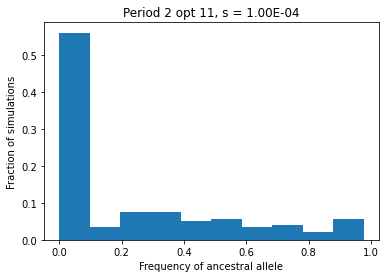

In [37]:
lrt_model = 'eurodem_unidir_sel_thresh0'#'eurodem_0810'
per = 2
opt_allele = 11
s_ABC = 0.0001
lrtFile = '/gymreklab-tscc/bonnieh/lrt/results/' + lrt_model + '/' + str(per) + '_' + str(opt_allele) + '_freqs.txt'
freqs_list = GetLRTListFreq(lrtFile, s_ABC)
#print(freqs_list)
freq_central = []
for freq_string in freqs_list:
    allele_freqs = [float(freq) for freq in freq_string.split(',')]
    #print(allele_freqs)
    #print(allele_freqs[12])
    freq_central.append(allele_freqs[12])
    
plt.hist(freq_central,weights = np.ones_like(freq_central)/float(len(freq_central)))
plt.xlabel('Frequency of ancestral allele')
plt.ylabel('Fraction of simulations')
plt.title('Period %d opt %d, s = %.2E'%(per, opt_allele, s_ABC))

Text(0.5, 1.0, 'Period 2 opt 11')

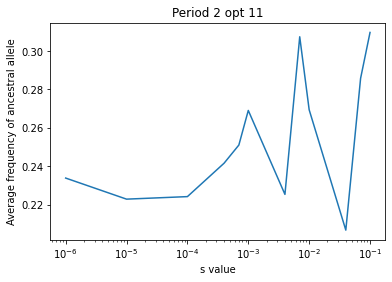

In [43]:
lrt_model = 'eurodem_unidir_sel_thresh0'#'eurodem_0810'
per = 2
opt_allele = 11
s_list = [0.000001,0.00001,0.0001,0.0004,0.0007,0.001,0.004,0.007,0.01,0.04,0.07,0.1]
freq_central_list = []
for s_ABC in s_list:
    lrtFile = '/gymreklab-tscc/bonnieh/lrt/results/' + lrt_model + '/' + str(per) + '_' + str(opt_allele) + '_freqs.txt'
    freqs_list = GetLRTListFreq(lrtFile, s_ABC)
    #print(freqs_list)
    freq_central = []
    for freq_string in freqs_list:
        allele_freqs = [float(freq) for freq in freq_string.split(',')]
        #print(allele_freqs)
        #print(allele_freqs[12])
        freq_central.append(allele_freqs[12])
    freq_central_list.append(np.mean(freq_central))
    
plt.plot(s_list, freq_central_list)
plt.xscale('log')
#plt.hist(freq_central,weights = np.ones_like(freq_central)/float(len(freq_central)))
plt.xlabel('s value')
plt.ylabel('Average frequency of ancestral allele')
plt.title('Period %d opt %d'%(per, opt_allele))